CNN MODEL

In [1]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing necessary libraries
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
%matplotlib inline

In [3]:
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

In [5]:
od.download('https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification?resource=download')

Skipping, found downloaded files in "./satellite-image-classification" (use force=True to force download)


In [6]:
data_dir = './satellite-image-classification'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/data")
print(classes)

['data']
['water', 'desert', 'cloudy', 'green_area']


In [7]:
cloudy_files = os.listdir(data_dir + "/data/cloudy")
desert_files = os.listdir(data_dir + "/data/desert")
green_area_files = os.listdir(data_dir + "/data/green_area")
water_files = os.listdir(data_dir + "/data/water")
print('No. of training examples for clouds:', len(cloudy_files))
print(cloudy_files[:5])

print('No. of training examples for desert:', len(desert_files))
print(desert_files[:5])

print('No. of training examples for green area:', len(green_area_files))
print(green_area_files[:5])

print('No. of training examples for water:', len(water_files))
print(water_files[:5])

No. of training examples for clouds: 1500
['train_5543.jpg', 'train_29353.jpg', 'train_8836.jpg', 'train_18672.jpg', 'train_18134.jpg']
No. of training examples for desert: 1131
['desert(966).jpg', 'desert(357).jpg', 'desert(858).jpg', 'desert(209).jpg', 'desert(411).jpg']
No. of training examples for green area: 1500
['Forest_2083.jpg', 'Forest_982.jpg', 'Forest_2253.jpg', 'Forest_360.jpg', 'Forest_225.jpg']
No. of training examples for water: 1500
['SeaLake_1505.jpg', 'SeaLake_94.jpg', 'SeaLake_1128.jpg', 'SeaLake_2381.jpg', 'SeaLake_2795.jpg']


In [8]:
##Changing the images size
import torchvision.datasets as datasets
from torchvision import datasets, transforms
desired_size = (64, 64)

transform = transforms.Compose([
    transforms.Resize(desired_size),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(data_dir+'/data', transform=transform)

In [9]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 64, 64]) 0


tensor([[[0.6039, 0.6314, 0.6196,  ..., 0.7725, 0.7882, 0.8000],
         [0.6157, 0.6275, 0.6157,  ..., 0.7569, 0.7765, 0.7843],
         [0.6196, 0.6235, 0.6275,  ..., 0.7451, 0.7608, 0.7725],
         ...,
         [0.8863, 0.8863, 0.8863,  ..., 0.5804, 0.5843, 0.5922],
         [0.8863, 0.8863, 0.8863,  ..., 0.5804, 0.5804, 0.5882],
         [0.8863, 0.8863, 0.8863,  ..., 0.5725, 0.5725, 0.5804]],

        [[0.5843, 0.6039, 0.5882,  ..., 0.7529, 0.7686, 0.7804],
         [0.5961, 0.6000, 0.5922,  ..., 0.7373, 0.7569, 0.7647],
         [0.5922, 0.5961, 0.6000,  ..., 0.7333, 0.7451, 0.7529],
         ...,
         [0.8039, 0.8039, 0.8039,  ..., 0.5961, 0.6000, 0.6000],
         [0.8039, 0.8039, 0.8039,  ..., 0.5922, 0.5961, 0.6000],
         [0.8039, 0.8039, 0.8039,  ..., 0.5922, 0.5922, 0.5961]],

        [[0.4902, 0.5098, 0.4980,  ..., 0.6745, 0.6902, 0.7020],
         [0.5020, 0.5059, 0.5020,  ..., 0.6588, 0.6745, 0.6902],
         [0.5059, 0.5020, 0.5098,  ..., 0.6471, 0.6627, 0.

In [10]:
random_seed = 30
torch.manual_seed(random_seed);

In [11]:
val_size = int(len(dataset) * 0.3)
test_size = int(len(dataset) * 0.2)
train_size = len(dataset) - val_size - test_size

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
len(train_ds), len(val_ds), len(test_ds)

(2816, 1689, 1126)

In [12]:
from torch.utils.data.dataloader import DataLoader
batch_size=128

In [13]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

In [14]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  cloudy (0)


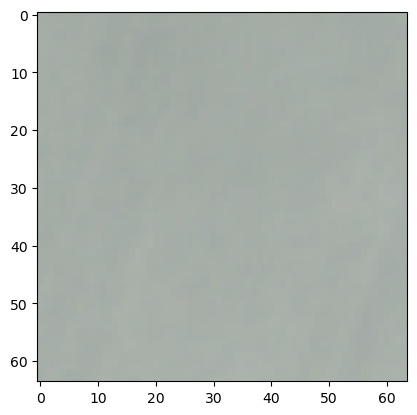

In [15]:
show_example(*dataset[1])

Label:  cloudy (0)


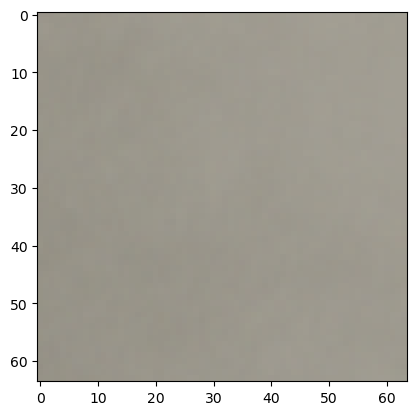

In [16]:
show_example(*dataset[3])

In [17]:
import torch.nn as nn
import torch.nn.functional as F

images.shape: torch.Size([128, 3, 64, 64])


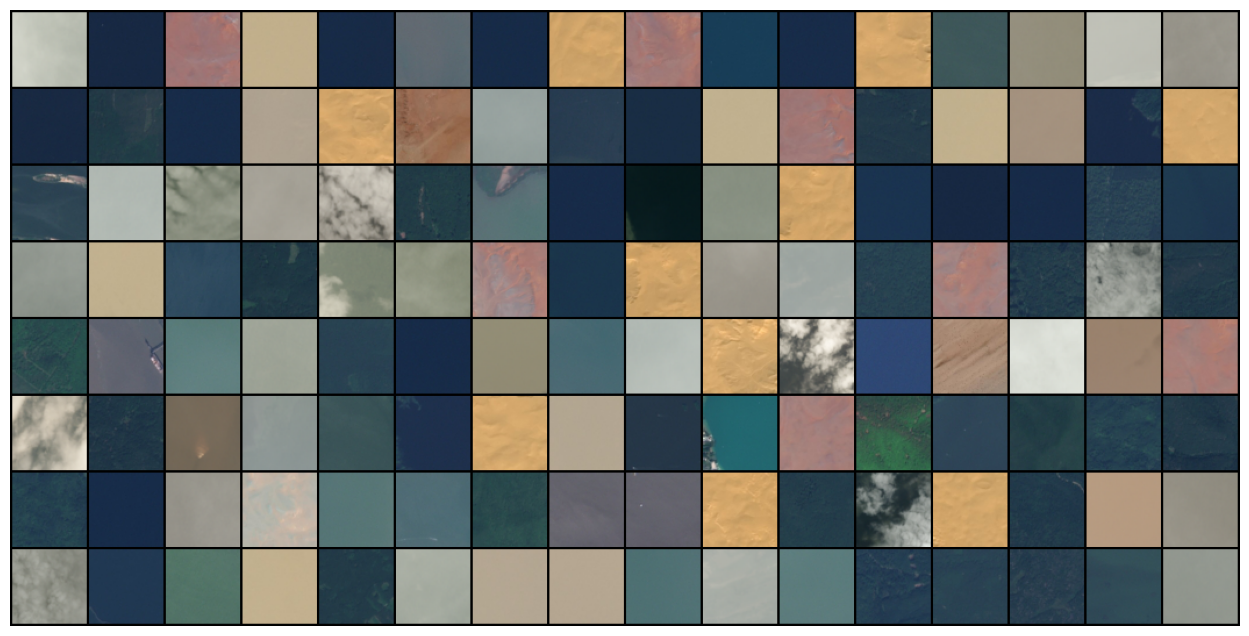

In [18]:
for images, _ in train_dl:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [19]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

In [20]:
#Defining CNN model
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [21]:
#Initializing CNN model
class SatelliteClassificationModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(),
            nn.Linear(256*8*8, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 4))

    def forward(self, xb):
        return self.network(xb)

In [22]:
model = SatelliteClassificationModel()
model

SatelliteClassificationModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=1024, bias=True)
    (17): ReLU()
    (18): 

In [23]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 64, 64])
out.shape: torch.Size([128, 4])
out[0]: tensor([-0.0086,  0.0177, -0.0420,  0.0144], grad_fn=<SelectBackward0>)


In [24]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
device = get_default_device()
device

device(type='cuda')

In [26]:
#Training CNN Model
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [27]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [29]:
model = to_device(SatelliteClassificationModel(), device)

In [30]:
evaluate(model, val_dl)

{'val_loss': 1.385365605354309, 'val_acc': 0.2622147798538208}

In [31]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [32]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.2806, val_loss: 0.8512, val_acc: 0.4149
Epoch [1], train_loss: 0.7986, val_loss: 0.7326, val_acc: 0.6364
Epoch [2], train_loss: 0.7404, val_loss: 0.6993, val_acc: 0.5481
Epoch [3], train_loss: 0.5986, val_loss: 0.5425, val_acc: 0.6698
Epoch [4], train_loss: 0.5569, val_loss: 0.6570, val_acc: 0.5840
Epoch [5], train_loss: 0.5318, val_loss: 0.4896, val_acc: 0.7014
Epoch [6], train_loss: 0.4995, val_loss: 0.5189, val_acc: 0.7452
Epoch [7], train_loss: 0.4863, val_loss: 0.4643, val_acc: 0.7409
Epoch [8], train_loss: 0.4420, val_loss: 0.3702, val_acc: 0.8293
Epoch [9], train_loss: 0.3629, val_loss: 0.3144, val_acc: 0.8850


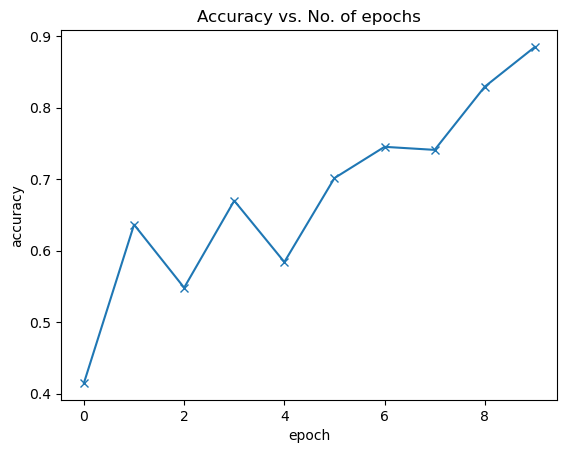

In [33]:
##How model improves over time
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
plot_accuracies(history)

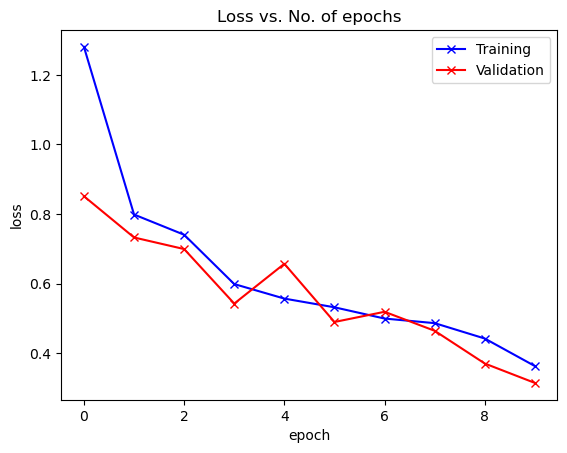

In [34]:
#How validation loss is decreasing with time
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
plot_losses(history)

In [35]:
#Testing Images

In [36]:
test_dataset = test_ds

In [37]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: cloudy , Predicted: cloudy


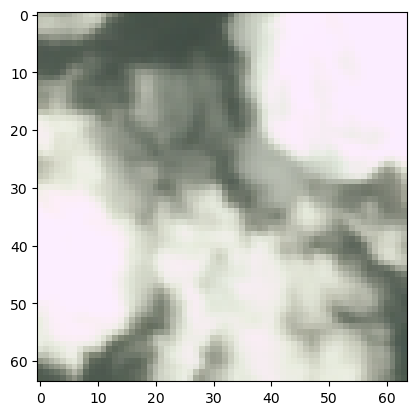

In [38]:
img, label = test_dataset[100]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: green_area , Predicted: water


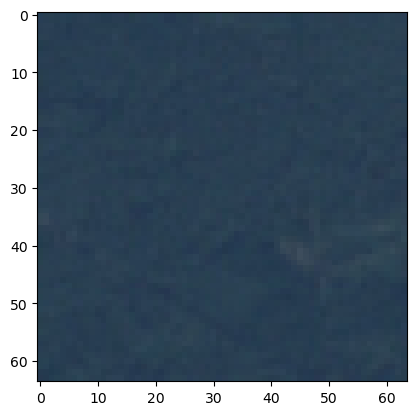

In [39]:
img, label = test_dataset[677]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: desert , Predicted: desert


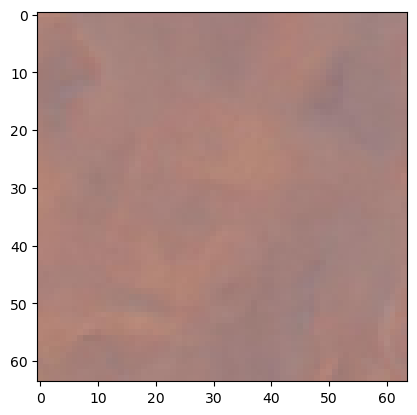

In [40]:
img, label = test_dataset[2]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [41]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.3340974748134613, 'val_acc': 0.8705881834030151}

In [42]:
torch.save(model.state_dict(), 'satellite-classification-model.pth')

VGG16 Model

In [43]:
! pip install split-folders
! pip install keras
! pip install tensorflow

In [44]:
class VGG16(ImageClassificationBase):
    def __init__(self, num_classes):
        super(VGG16, self).__init__()
        self.network = nn.Sequential(
            # Group 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # Group 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # Group 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # Group 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # Group 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            # Fully connected layers
            nn.Flatten(),
            nn.Linear(512 * 2 * 2, 4096),  # Adjust input size based on your spatial dimensions
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, xb):
        return self.network(xb)


In [45]:
model = to_device(VGG16(num_classes=4), device)
model

VGG16(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [46]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 64, 64])
out.shape: torch.Size([128, 4])
out[0]: tensor([-0.0026,  0.0115, -0.0231, -0.0048], device='cuda:0',
       grad_fn=<SelectBackward0>)


In [47]:
# Define hyperparameters
epochs = 10
learning_rate = 0.001

# Create an instance of the VGG16 model
vgg16_model = VGG16(num_classes=4)

# Move the model to the specified device (e.g., GPU if available)
to_device(vgg16_model, device)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(vgg16_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
history = fit(epochs, learning_rate, vgg16_model, train_dl, val_dl, opt_func=torch.optim.Adam)

# Print training summary
for epoch, epoch_result in enumerate(history):
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {epoch_result['train_loss']:.4f}, "
          f"Validation Loss: {epoch_result['val_loss']:.4f}, "
          f"Validation Accuracy: {epoch_result['val_acc']:.4f}")


# Optional: Save the trained model weights
torch.save(vgg16_model.state_dict(), 'vgg16_model_weights.pth')


Epoch [0], train_loss: 1.4242, val_loss: 1.3835, val_acc: 0.2721
Epoch [1], train_loss: 1.2225, val_loss: 1.0723, val_acc: 0.4902
Epoch [2], train_loss: 0.8271, val_loss: 0.7420, val_acc: 0.4601
Epoch [3], train_loss: 0.8656, val_loss: 0.8574, val_acc: 0.5289
Epoch [4], train_loss: 0.7803, val_loss: 0.7389, val_acc: 0.5285
Epoch [5], train_loss: 0.7608, val_loss: 0.7536, val_acc: 0.5286
Epoch [6], train_loss: 0.7605, val_loss: 0.7443, val_acc: 0.4578
Epoch [7], train_loss: 0.8548, val_loss: 0.7516, val_acc: 0.5330
Epoch [8], train_loss: 0.7693, val_loss: 0.7750, val_acc: 0.5345
Epoch [9], train_loss: 0.7492, val_loss: 0.7257, val_acc: 0.4610
Epoch [1/10] - Train Loss: 1.4242, Validation Loss: 1.3835, Validation Accuracy: 0.2721
Epoch [2/10] - Train Loss: 1.2225, Validation Loss: 1.0723, Validation Accuracy: 0.4902
Epoch [3/10] - Train Loss: 0.8271, Validation Loss: 0.7420, Validation Accuracy: 0.4601
Epoch [4/10] - Train Loss: 0.8656, Validation Loss: 0.8574, Validation Accuracy: 0.528

In [48]:
evaluate(model, val_dl)



{'val_loss': 1.387198805809021, 'val_acc': 0.1950681209564209}

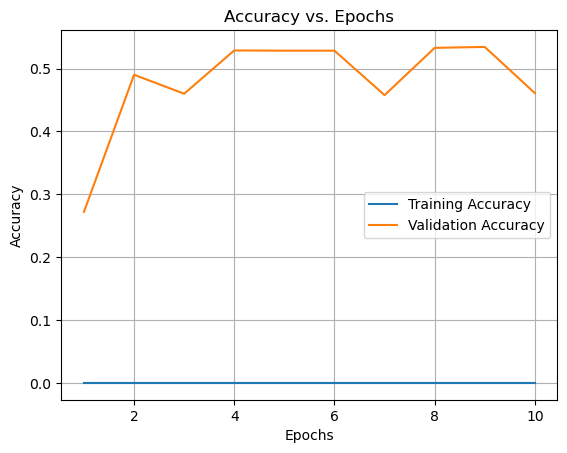

In [49]:
#How accuracy improving with time
import matplotlib.pyplot as plt

# Extract accuracy values from the history dictionary
train_acc = [result.get('train_acc', 0) for result in history]
val_acc = [result.get('val_acc', 0) for result in history]

# Create an array of epoch numbers
epochs = range(1, epochs + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()



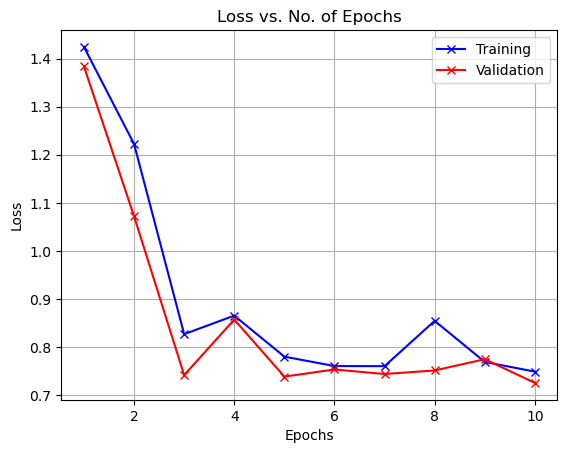

In [50]:
#How loss decreasing with time
def plot_losses(history):
    train_losses = [result['train_loss'] for result in history]
    val_losses = [result['val_loss'] for result in history]
    epochs = range(1, len(train_losses) + 1)
    
    plt.plot(epochs, train_losses, '-bx', label='Training Loss')
    plt.plot(epochs, val_losses, '-rx', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of Epochs')
    plt.grid(True)
    plt.show()

plot_losses(history)


In [51]:
#Testing Images

In [52]:
test_dataset = test_ds

Label: green_area , Predicted: green_area


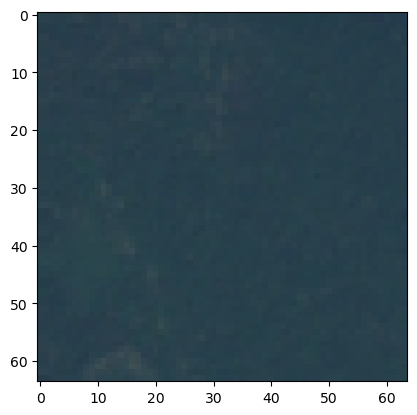

In [53]:
img, label = test_dataset[333]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, vgg16_model))



In [54]:
! pip install scikit-learn
! pip install --upgrade scikit-learn


In [55]:
#Performance of VGG16
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Function to get predictions from the model
def get_predictions(model, data_loader):
    model.eval()
    predictions = []
    ground_truth = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = to_device(images, device)
            labels = to_device(labels, device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            ground_truth.extend(labels.cpu().numpy())

    return np.array(predictions), np.array(ground_truth)

# Get predictions and ground truth labels for the validation dataset
val_predictions, val_ground_truth = get_predictions(model, val_dl)

# Calculate accuracy
accuracy = accuracy_score(val_ground_truth, val_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision for each class
precision_per_class = precision_score(val_ground_truth, val_predictions, average=None)

# Calculate recall for each class
recall_per_class = recall_score(val_ground_truth, val_predictions, average=None)

# Calculate F1-score for each class
f1_score_per_class = f1_score(val_ground_truth, val_predictions, average=None)

# If you want the precision, recall, and F1-score averaged over all classes, you can use 'macro' or 'weighted'
precision_macro = precision_score(val_ground_truth, val_predictions, average='macro')
recall_macro = recall_score(val_ground_truth, val_predictions, average='macro')
f1_score_macro = f1_score(val_ground_truth, val_predictions, average='macro')

precision_weighted = precision_score(val_ground_truth, val_predictions, average='weighted')
recall_weighted = recall_score(val_ground_truth, val_predictions, average='weighted')
f1_score_weighted = f1_score(val_ground_truth, val_predictions, average='weighted')

print(f'Precision per class: {precision_per_class}')
print(f'Recall per class: {recall_per_class}')
print(f'F1-score per class: {f1_score_per_class}')

print(f'Macro Precision: {precision_macro:.4f}')
print(f'Macro Recall: {recall_macro:.4f}')
print(f'Macro F1-score: {f1_score_macro:.4f}')

print(f'Weighted Precision: {precision_weighted:.4f}')
print(f'Weighted Recall: {recall_weighted:.4f}')
print(f'Weighted F1-score: {f1_score_weighted:.4f}')

Accuracy: 0.1930
Precision per class: [0.         0.19301362 0.         0.        ]
Recall per class: [0. 1. 0. 0.]
F1-score per class: [0.        0.3235732 0.        0.       ]
Macro Precision: 0.0483
Macro Recall: 0.2500
Macro F1-score: 0.0809
Weighted Precision: 0.0373
Weighted Recall: 0.1930
Weighted F1-score: 0.0625


/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
